In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [58]:
df = pd.read_csv('data/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240127.csv')
df.head(5)

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,02/18/2011,05:27,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129525 entries, 0 to 2129524
Data columns (total 35 columns):
 #   Column                                                    Dtype  
---  ------                                                    -----  
 0   PdId                                                      int64  
 1   IncidntNum                                                int64  
 2   Incident Code                                             int64  
 3   Category                                                  object 
 4   Descript                                                  object 
 5   DayOfWeek                                                 object 
 6   Date                                                      object 
 7   Time                                                      object 
 8   PdDistrict                                                object 
 9   Resolution                                                object 
 10  Address                       

In [60]:
df.shape

(2129525, 35)

### Exercise 1 ###

**1. Report the total number of crimes in the dataset.**

In [61]:
total_crimes = len(df)
print(f'Total number of crimes in the dataset: {total_crimes}')

Total number of crimes in the dataset: 2129525


**2. List the various categories of crime. How many are there?**

In [62]:
category = df['Category'].unique()
category

array(['ROBBERY', 'VEHICLE THEFT', 'ARSON', 'ASSAULT', 'TRESPASS',
       'BURGLARY', 'LARCENY/THEFT', 'WARRANTS', 'OTHER OFFENSES',
       'DRUG/NARCOTIC', 'SUSPICIOUS OCC', 'LIQUOR LAWS', 'VANDALISM',
       'WEAPON LAWS', 'NON-CRIMINAL', 'MISSING PERSON', 'FRAUD',
       'SEX OFFENSES, FORCIBLE', 'SECONDARY CODES', 'DISORDERLY CONDUCT',
       'RECOVERED VEHICLE', 'KIDNAPPING', 'FORGERY/COUNTERFEITING',
       'PROSTITUTION', 'DRUNKENNESS', 'BAD CHECKS',
       'DRIVING UNDER THE INFLUENCE', 'LOITERING', 'STOLEN PROPERTY',
       'SUICIDE', 'BRIBERY', 'EXTORTION', 'EMBEZZLEMENT', 'GAMBLING',
       'PORNOGRAPHY/OBSCENE MAT', 'SEX OFFENSES, NON FORCIBLE', 'TREA'],
      dtype=object)

In [63]:
# total_category = len(category)
total_category = df['Category'].nunique()
total_category

37

***List the number of crimes in each category.***

In [64]:
category_number_of_crimes = df['Category'].value_counts()
print(category_number_of_crimes)

Category
LARCENY/THEFT                  477975
OTHER OFFENSES                 301874
NON-CRIMINAL                   236928
ASSAULT                        167042
VEHICLE THEFT                  126228
DRUG/NARCOTIC                  117821
VANDALISM                      114718
WARRANTS                        99821
BURGLARY                        91067
SUSPICIOUS OCC                  79087
ROBBERY                         54467
MISSING PERSON                  44268
FRAUD                           41348
FORGERY/COUNTERFEITING          22995
SECONDARY CODES                 22378
WEAPON LAWS                     21004
TRESPASS                        19194
PROSTITUTION                    16501
STOLEN PROPERTY                 11450
DISORDERLY CONDUCT               9932
DRUNKENNESS                      9760
SEX OFFENSES, FORCIBLE           8747
RECOVERED VEHICLE                8688
DRIVING UNDER THE INFLUENCE      5652
KIDNAPPING                       4282
ARSON                            3875
EMB

### Exercise 2 ###

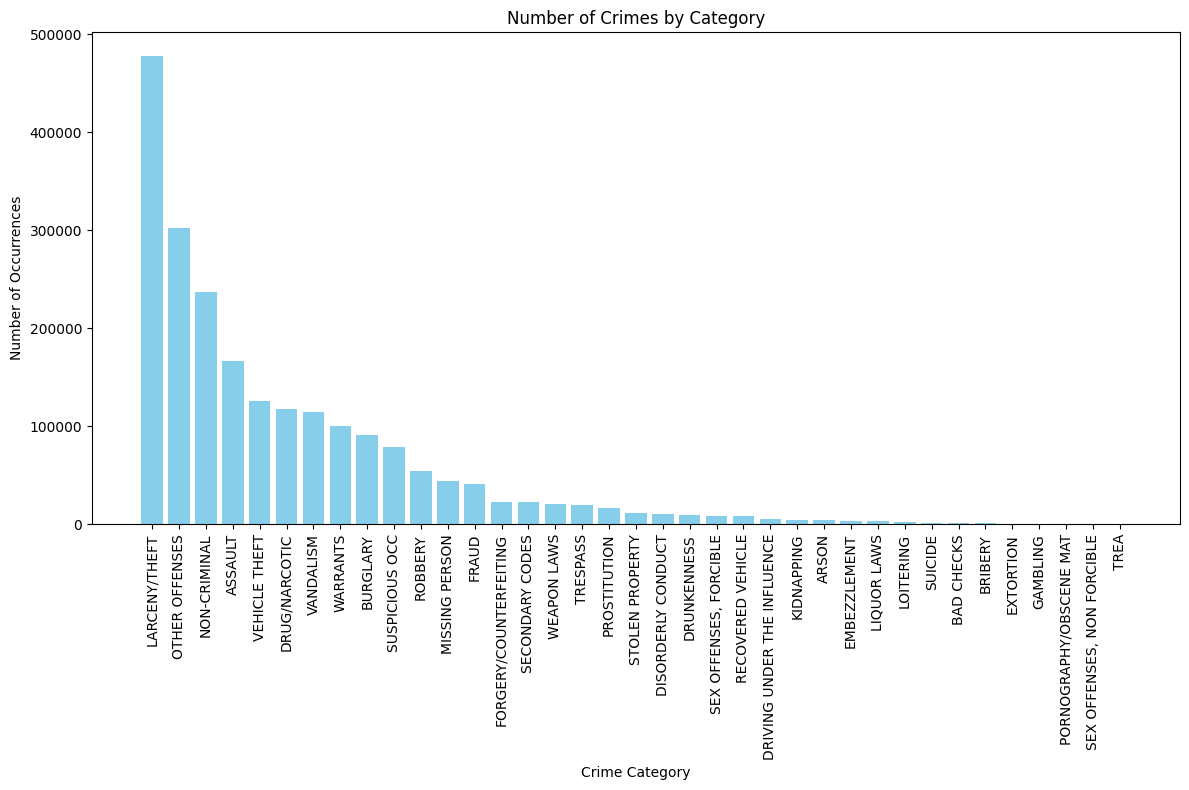

In [65]:
crime_counts = category_number_of_crimes.sort_values(ascending=False) 
# Creating the bar plot
plt.figure(figsize=(12, 8)) 
plt.bar(crime_counts.index, crime_counts.values, color='skyblue') 
plt.xlabel('Crime Category')  
plt.ylabel('Number of Occurrences') 
plt.title('Number of Crimes by Category')  
plt.xticks(rotation=90)  
plt.tight_layout() 
# Display the plot
plt.show()

### Exercise 3 ###

1. What is the year with most crimes?
2. What is the year with the fewest crimes?

In [66]:
df['Year'] = pd.to_datetime(df['Date']).dt.year

In [67]:
df_filtered = df[df['Year'].between(2003, 2017)]

In [68]:
# Count the number of crimes per year
crimes_per_year = df_filtered['Year'].value_counts().sort_index()
crimes_per_year

Year
2003    142803
2004    142054
2005    137048
2006    131856
2007    131771
2008    135242
2009    134309
2010    127758
2011    126713
2012    135464
2013    147664
2014    144844
2015    151459
2016    145994
2017    149487
Name: count, dtype: int64

In [69]:
most_crimes_year = crimes_per_year.idxmax()
fewest_crimes_year = crimes_per_year.idxmin()
print(f"Year with the most crimes: {most_crimes_year}")
print(f"Year with the fewest crimes: {fewest_crimes_year}")

Year with the most crimes: 2015
Year with the fewest crimes: 2011


**Create a barplot of crimes-per-year**

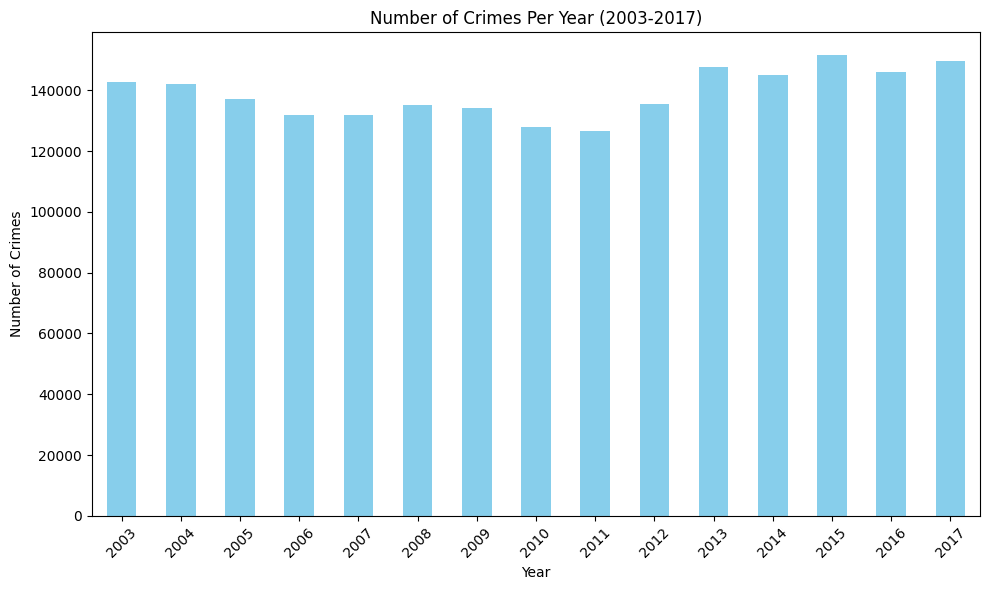

In [70]:
# Bar Plot for Crimes Per Year
plt.figure(figsize=(10, 6))
crimes_per_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes Per Year (2003-2017)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***subset of categories, the so-called *focus crimes*.***

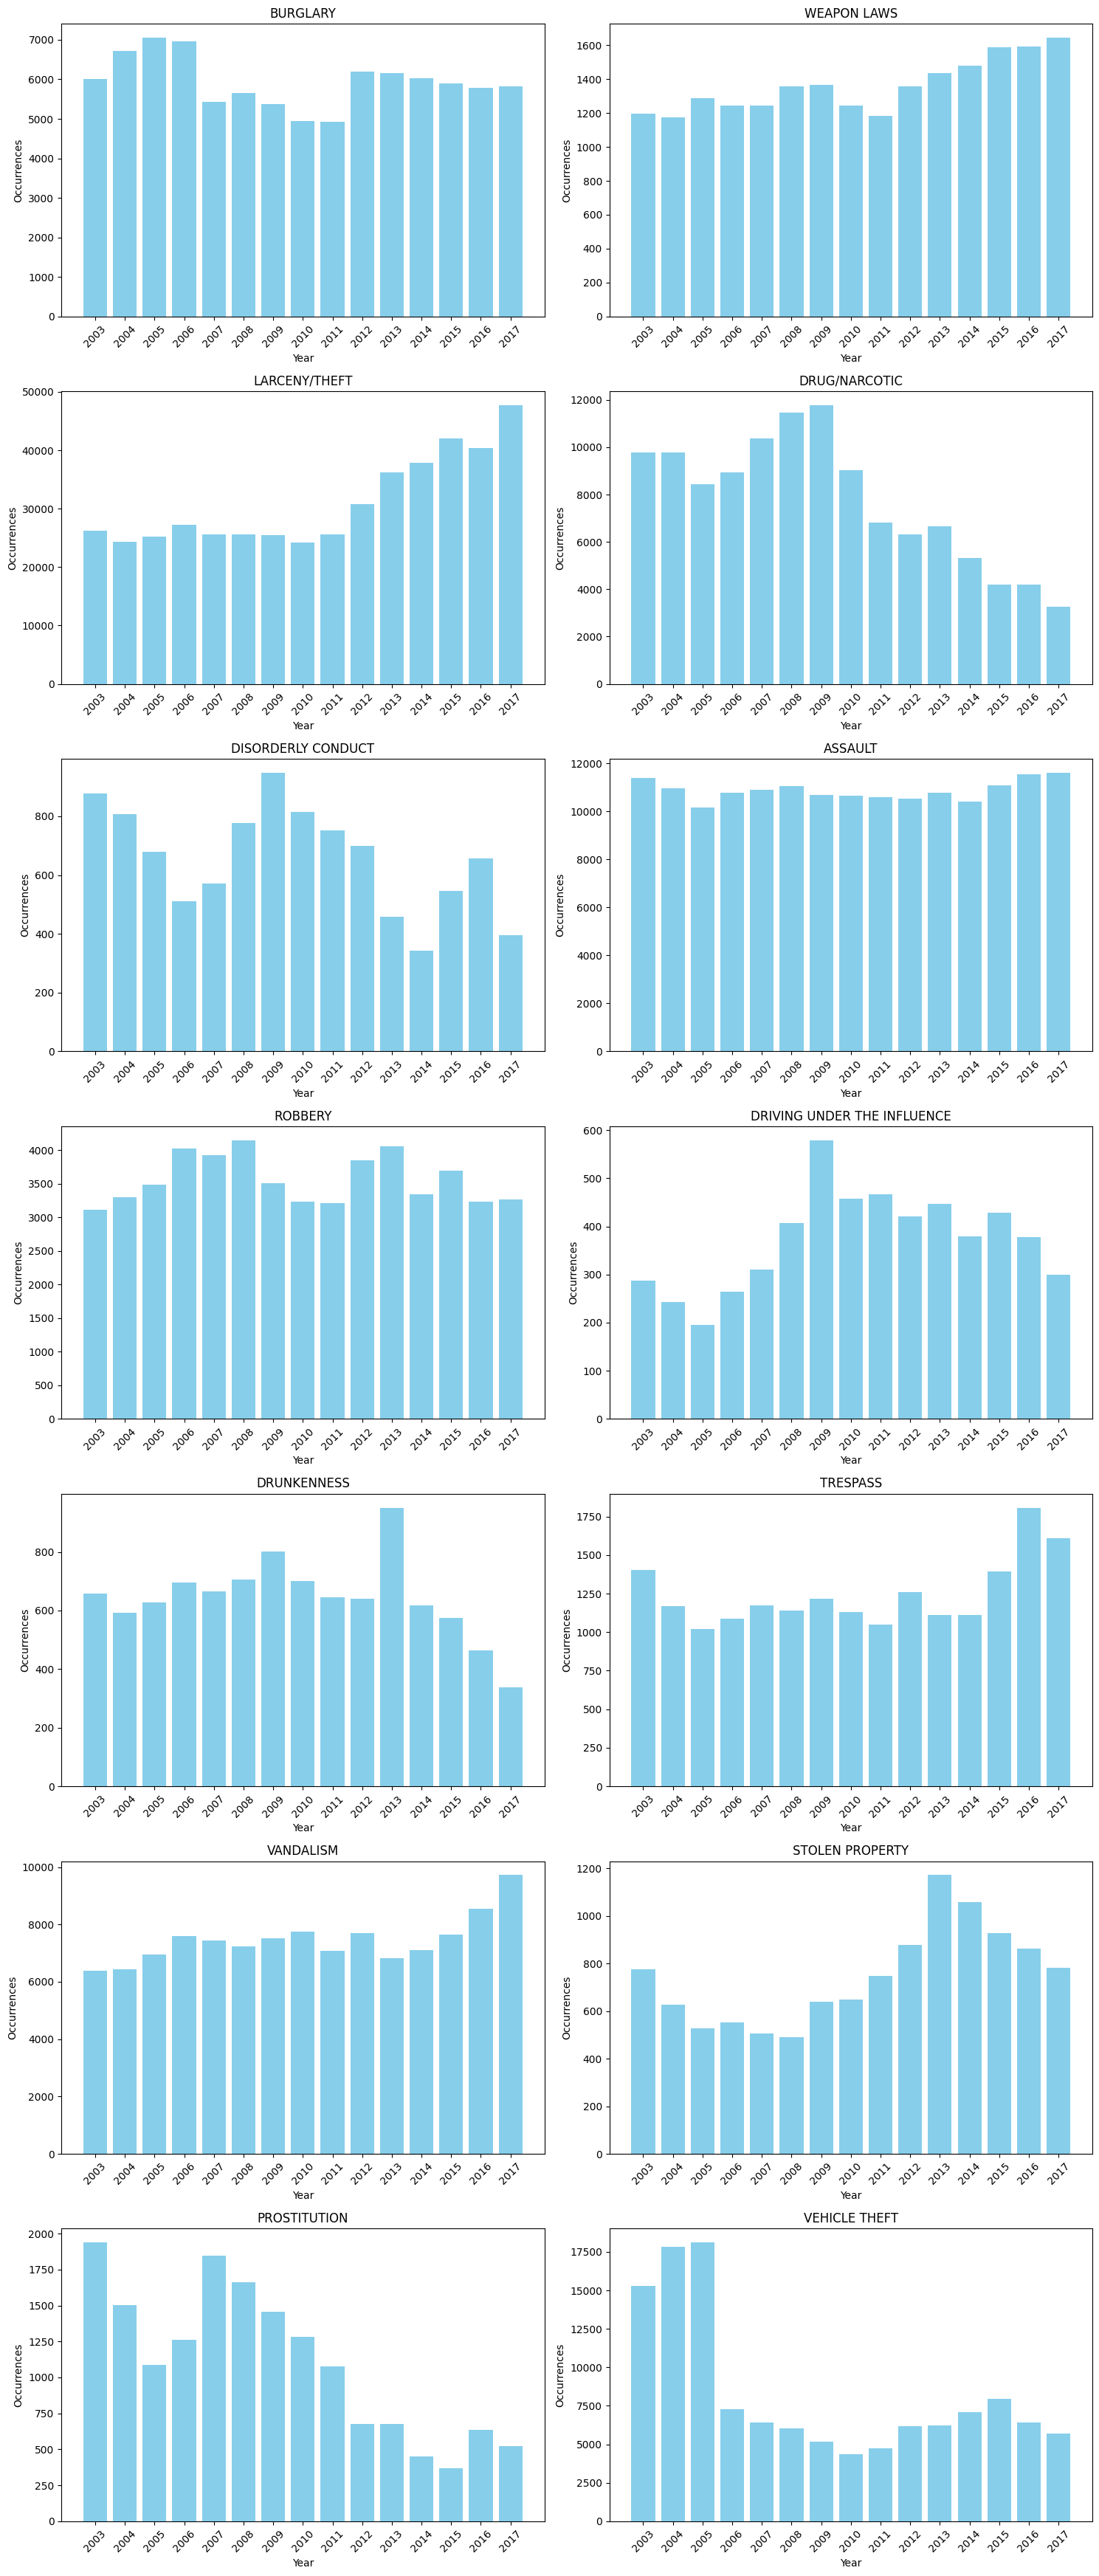

In [73]:
num_crimes = len(focuscrimes)
num_rows = (num_crimes + 1) // 2  # Calculate rows needed, add 1 for potential odd number
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))  # Adjust figsize accordingly
axes = axes.ravel()  # Flatten the array of axes

# Plot each crime category in its subplot
for ax, crime in zip(axes, focuscrimes):
    # Filter the data for the current crime and get the yearly counts
    yearly_counts = df_filtered[df_filtered['Category'] == crime]['Year'].value_counts().sort_index()
    ax.bar(yearly_counts.index.astype(str), yearly_counts.values, color='skyblue')
    ax.set_title(crime)
    ax.set_xlabel('Year')
    ax.set_ylabel('Occurrences')
    ax.tick_params(axis='x', rotation=45)

# If number of crimes is odd, the last subplot will be empty and can be turned off
if len(axes) > len(focuscrimes):
    fig.delaxes(axes[-1])

# Adjust the layout so that labels and titles do not overlap
fig.tight_layout()

# Show the plot
plt.show()